<blockquote>
    <h1>Exercise 4.11</h1>
    <p>In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the <code>Auto</code> data set.</p>
    <ol>
        <li>Create a binary variable, $\mathrm{mpg01}$, that contains a $1$ if $\mathrm{mpg}$ contains a value above its median, and a $0$ if $\mathrm{mpg}$ contains a value below its median. You can compute the median using the <code>median()</code> function. Note you may find it helpful to use the <code>data.frame()</code> function to create a single data set containing both $\mathrm{mpg01}$ and the other <code>Auto</code> variables.</li>
        <li>Explore the data graphically in order to investigate the association between $\mathrm{mpg01}$ and the other features. Which of the other features seem most likely to be useful in predicting $\mathrm{mpg01}$? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.</li>
        <li>Split the data into a training set and a test set.</li>
        <li>Perform LDA on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</li>
        <li>Perform QDA on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</li>
        <li>Perform logistic regression on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?</li>
        <li>Perform KNN on the training data, with several values of $K$, in order to predict $\mathrm{mpg01}$. Use only the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What test errors do you obtain? Which value of $K$ seems to perform the best on this data set?</li>        
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h2>Data Exploration</h2>
<p>We first read the comma-separated values (csv) <code>Auto</code> file into a pandas DataFrame, for which we will show the top five rows.</p>

In [2]:
df = pd.read_csv("../../DataSets/Auto/Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<p>We know from our <a href="../../DataSets/Auto/Exploration.ipynb">Eploration notebook</a> for the <code>Auto</code> file that <code>horsepower</code> column contains $5$ missing values identified by the <code>'?'</code> string.</p>

In [3]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


<p>As explained in the <a href="../../DataSets/Auto/Exploration.ipynb">Eploration notebook</a>, we will <i>coercively</i> convert the <code>horsepower</code> column from an <code>object</code> type to a <code>numeric</code> type using pandas <code>to_numeric()</code> method. This will cause all the <code>'?'</code> strings to be converted to <code>NaN</code> values. Finally, we will use the <code>dropna()</code> method to remove the rows with missing values.</p>

In [4]:
df.set_index('name', inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Exercise 4.11.1</h3>
<blockquote>
    <i>Create a binary variable, $\mathrm{mpg01}$, that contains a $1$ if $\mathrm{mpg}$ contains a value above its median, and a $0$ if $\mathrm{mpg}$ contains a value below its median. You can compute the median using the <code>median()</code> function. Note you may find it helpful to use the <code>data.frame()</code> function to create a single data set containing both $\mathrm{mpg01}$ and the other <code>Auto</code> variables.</i>
</blockquote>

In [5]:
median_mpg = df['mpg'].median()
df['mpg01'] = np.where(df['mpg'] > median_mpg, 1, 0)

<h3>Exercise 4.11.2</h3>
<blockquote>
    <i>Explore the data graphically in order to investigate the association between $\mathrm{mpg01}$ and the other features. Which of the other features seem most likely to be useful in predicting $\mathrm{mpg01}$? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.</i>
</blockquote>

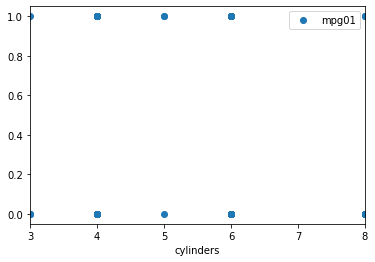

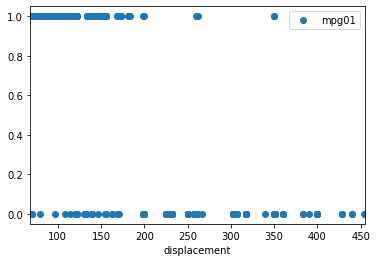

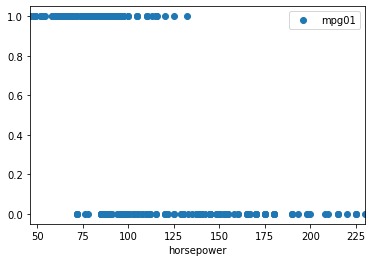

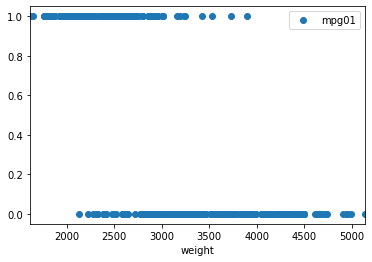

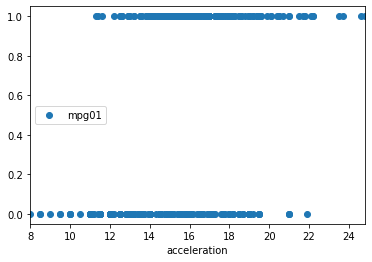

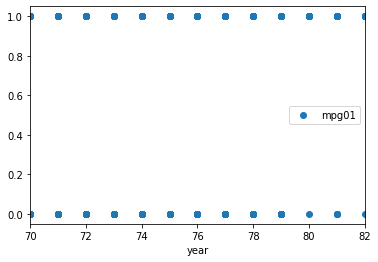

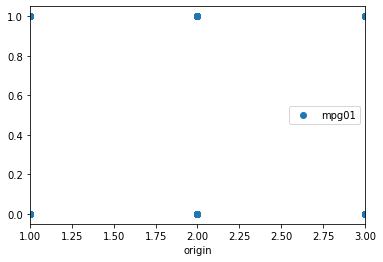

In [6]:
for column in df.columns:
    if column == 'mpg' or column == 'mpg01':
        continue
    
    _ = df.plot(x=column, y='mpg01', style='o')

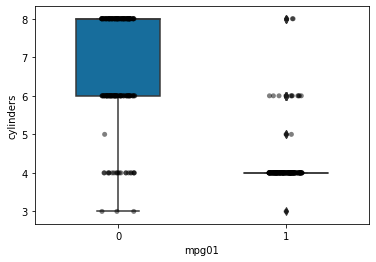

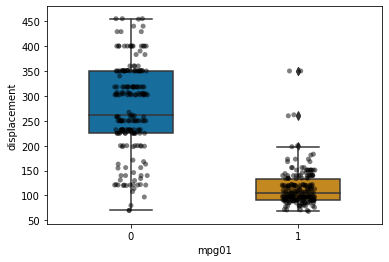

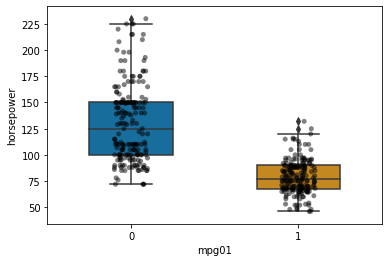

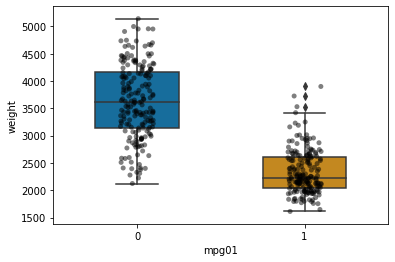

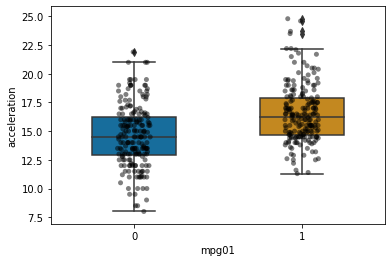

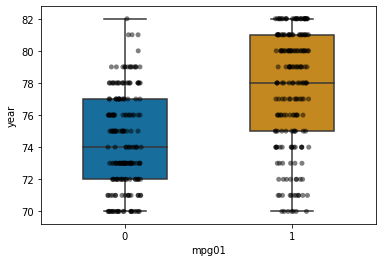

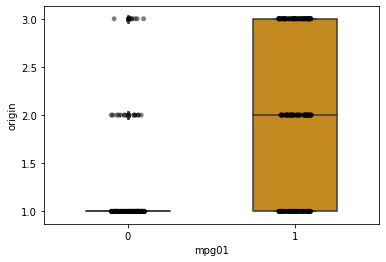

In [7]:
for index, column in enumerate(df.columns):
    if column == 'mpg' or column == 'mpg01':
        continue
        
    _ = plt.figure(index)
    # http://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/
    # make boxplot with Seaborn
    _ = sns.boxplot(y=column, x='mpg01', data=df, width=0.5, palette="colorblind")
    # add stripplot to boxplot with Seaborn
    _ = sns.stripplot(y=column, x='mpg01', data=df, jitter=True, marker='o', 
                          alpha=0.5, color='black')

<p>From the boxplots it appears that the $\mathrm{horsepower}$, $\mathrm{weight}$, $\mathrm{acceleration}$, $\mathrm{displacement}$ and $\mathrm{year}$ variables could be useful in predicting $\mathrm{mpg01}$.



Split the data into a training set and a test set.

Perform LDA on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?

Perform QDA on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?

Perform logistic regression on the training data in order to predict $\mathrm{mpg01}$ using the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What is the test error of the model obtained?

Perform KNN on the training data, with several values of $K$, in order to predict $\mathrm{mpg01}$. Use only the variables that seemed most associated with $\mathrm{mpg01}$ in 2. What test errors do you obtain? Which value of $K$ seems to perform the best on this data set?